# PyTorch Churn Prediction

## Important Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [83]:
import torch
from torch import nn

In [84]:
df = pd.read_csv("churn_prediction.csv")

In [85]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [86]:
df.shape

(7032, 41)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

<Figure size 1200x800 with 0 Axes>

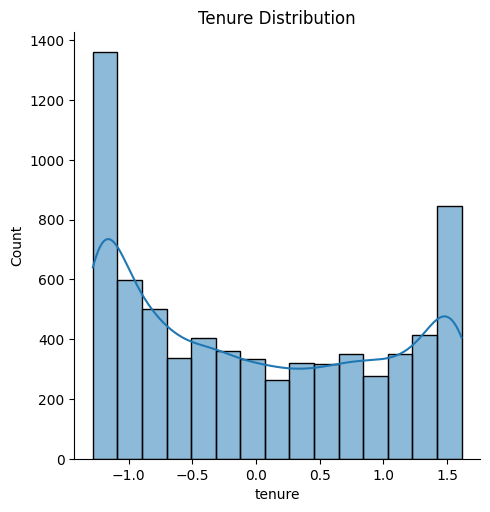

In [88]:
plt.figure(figsize=(12,8))
sns.displot(x="tenure", data=df, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("tenure")
plt.show()

<Figure size 1200x800 with 0 Axes>

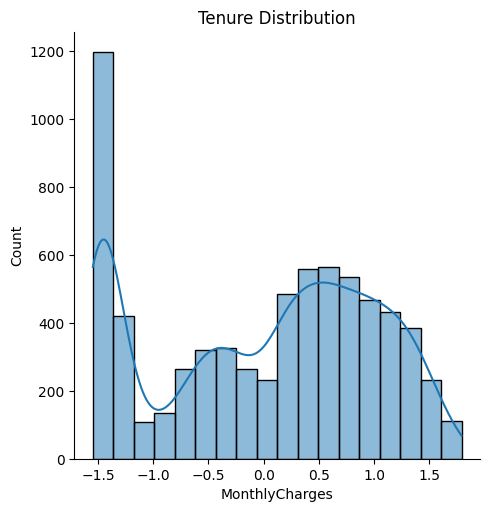

In [89]:
plt.figure(figsize=(12,8))
sns.displot(x="MonthlyCharges", data=df, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("MonthlyCharges")
plt.show()

<Figure size 1200x800 with 0 Axes>

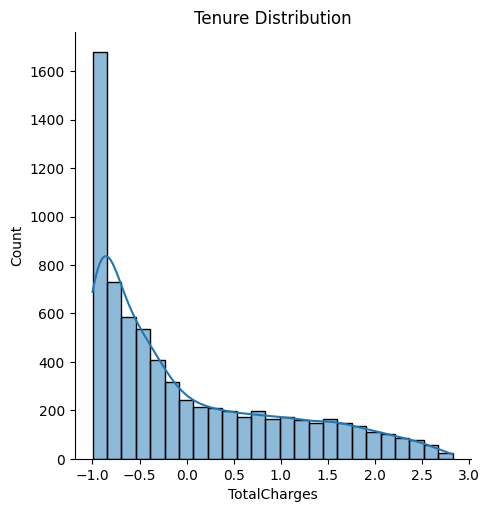

In [90]:
plt.figure(figsize=(12, 8))
sns.displot(x="TotalCharges", data=df, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("TotalCharges")
plt.show()

## Target Variable - Imbalanced Classes
## Oversampling - SMOTE

In [91]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [92]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

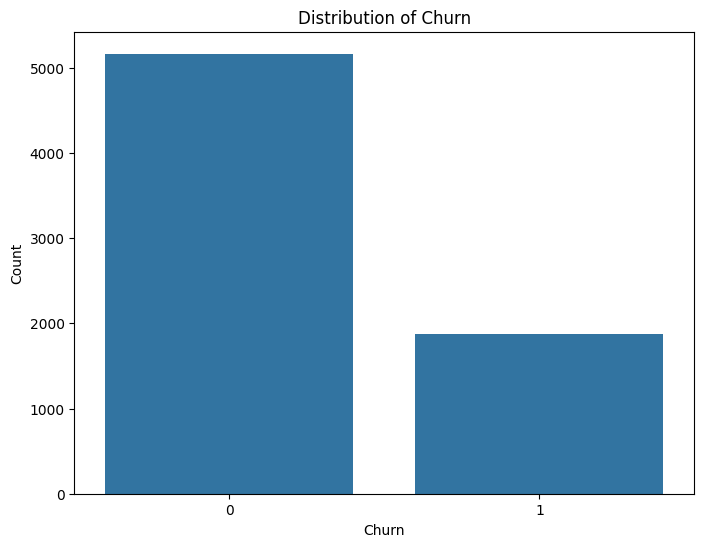

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [94]:
from imblearn.over_sampling import SMOTE
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [95]:
X.shape, y.shape

((7032, 40), (7032,))

In [96]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [97]:
X_resampled.shape, y_resampled.shape

((10326, 40), (10326,))

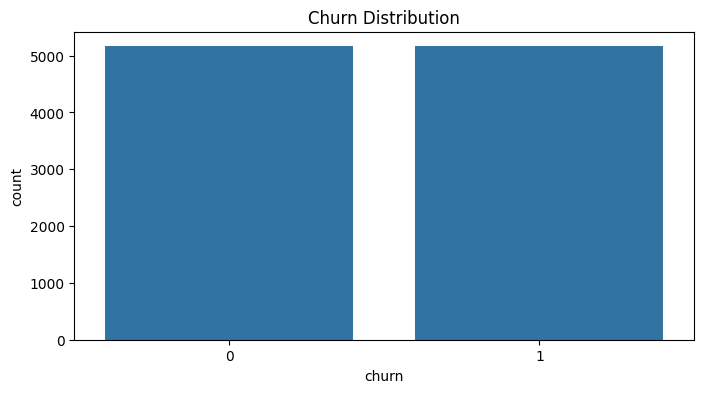

In [98]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_resampled)
plt.title("Churn Distribution")
plt.xlabel("churn")
plt.show()

## PyTorch

In [99]:
X_np = X_resampled.values
y_np = y_resampled.values

X_tensor = torch.tensor(X_np, dtype=torch.float)
y_tensor = torch.tensor(y_np)

In [100]:
X_tensor.shape, y_tensor.shape

(torch.Size([10326, 40]), torch.Size([10326]))

In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu" 

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [104]:
X_train.shape, X_dev.shape, X_test.shape

(torch.Size([8260, 40]), torch.Size([1033, 40]), torch.Size([1033, 40]))

In [105]:
input_size = 40
hidden_sizes = [32,32,32]
output_size = 2

class ChurnPredictionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_sizes[i], hidden_sizes[i+1]) for i in range(len(hidden_sizes) - 1)
        ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
    
    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = torch.softmax(self.output_layer(x), dim=1)
        
        return x
    

In [106]:
churn_model = ChurnPredictionModel().to(device)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=churn_model.parameters(),
                             lr=0.001)

## Training Loop

In [107]:
epochs = 1000
epochs_count = []
train_loss_list = []
dev_loss_list = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_dev, y_dev = X_dev.to(device), y_dev.to(device)

for epoch in range(epochs):
    
    # Training Mode
    churn_model.train()
    # 1. Forward 
    y_train_preds = churn_model(X_train)
    # 2. Loss
    train_loss = loss_fn(y_train_preds, y_train)
    # 3. Zero Grad 
    optimizer.zero_grad()
    # 4. Backward
    train_loss.backward()
    # 5. Step 
    optimizer.step()
    # Evaluation Mode
    churn_model.eval()
    with torch.inference_mode():
        y_dev_preds = churn_model(X_dev)
        dev_loss = loss_fn(y_dev_preds, y_dev)
        
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_list.append(train_loss)
            dev_loss_list.append(dev_loss)
            
            print(f"At training during epoch {epoch} the error is {train_loss}")
            print(f"At development during epoch {epoch} the error is {dev_loss}")

At training during epoch 0 the error is 0.6924126744270325
At development during epoch 0 the error is 0.6917988657951355
At training during epoch 10 the error is 0.6805856823921204
At development during epoch 10 the error is 0.6794823408126831
At training during epoch 20 the error is 0.6589401960372925
At development during epoch 20 the error is 0.6568554639816284
At training during epoch 30 the error is 0.6226272583007812
At development during epoch 30 the error is 0.62001633644104
At training during epoch 40 the error is 0.5729808807373047
At development during epoch 40 the error is 0.5710987448692322
At training during epoch 50 the error is 0.536674976348877
At development during epoch 50 the error is 0.5378429293632507
At training during epoch 60 the error is 0.5240107178688049
At development during epoch 60 the error is 0.5272964835166931
At training during epoch 70 the error is 0.5203366279602051
At development during epoch 70 the error is 0.523864209651947
At training during epo

In [108]:
train_loss_list = np.array(torch.tensor(train_loss_list).detach().numpy()) 
dev_loss_list = np.array(torch.tensor(dev_loss_list).detach().numpy())

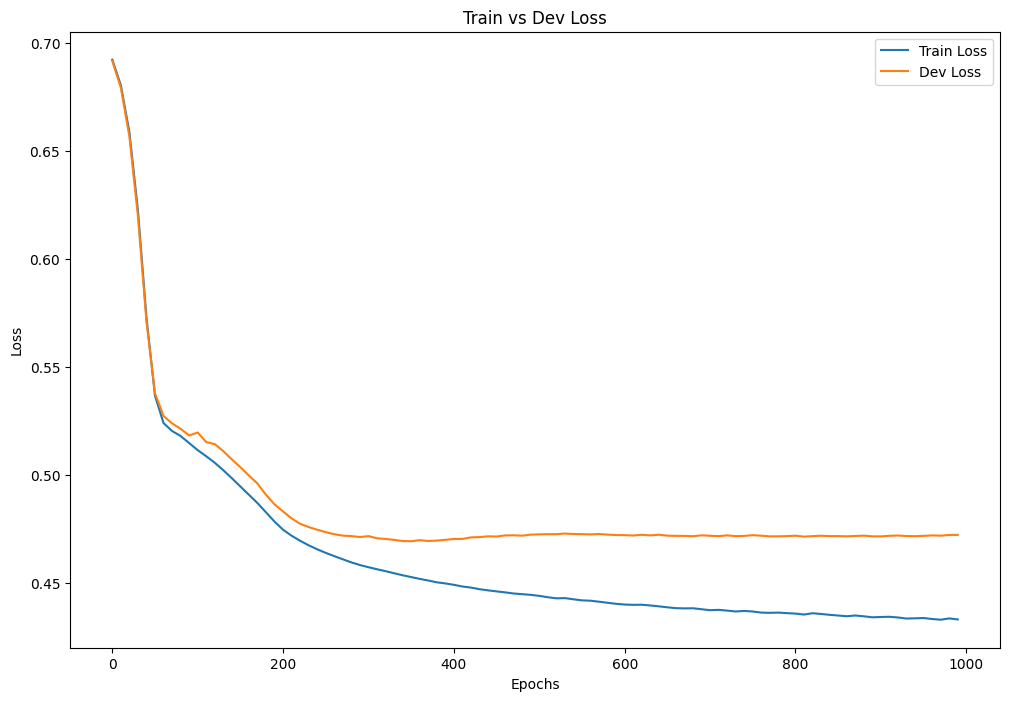

In [109]:
plt.figure(figsize=(12,8))
plt.plot(epochs_count, train_loss_list, label="Train Loss")
plt.plot(epochs_count, dev_loss_list, label="Dev Loss")
plt.title("Train vs Dev Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [111]:
epochs = 1000
epochs_count = []
train_loss_list = []
dev_loss_list = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_dev, y_dev = X_dev.to(device), y_dev.to(device)

for epoch in range(epochs):
    
    # Training Mode
    churn_model.train()
    # 1. Forward 
    y_train_preds = churn_model(X_train)
    # 2. Loss
    train_loss = loss_fn(y_train_preds, y_train)
    # 3. Zero Grad 
    optimizer.zero_grad()
    # 4. Backward
    train_loss.backward()
    # 5. Step 
    optimizer.step()
    # Evaluation Mode
    churn_model.eval()
    with torch.inference_mode():
        y_dev_preds = churn_model(X_dev)
        dev_loss = loss_fn(y_dev_preds, y_dev)
        
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_list.append(train_loss)
            dev_loss_list.append(dev_loss)
            
            # Convert predictions to class labels
        _, y_train_preds_class = torch.max(y_train_preds, 1)
        _, y_dev_preds_class = torch.max(y_dev_preds, 1)

        # Compute confusion matrices
        train_conf_matrix = confusion_matrix(y_train.cpu().numpy(), y_train_preds_class.cpu().numpy())
        dev_conf_matrix = confusion_matrix(y_dev.cpu().numpy(), y_dev_preds_class.cpu().numpy())

        # Compute metrics
        train_accuracy = accuracy_score(y_train.cpu().numpy(), y_train_preds_class.cpu().numpy())
        dev_accuracy = accuracy_score(y_dev.cpu().numpy(), y_dev_preds_class.cpu().numpy())

        train_precision = precision_score(y_train.cpu().numpy(), y_train_preds_class.cpu().numpy(), average='weighted')
        dev_precision = precision_score(y_dev.cpu().numpy(), y_dev_preds_class.cpu().numpy(), average='weighted')

        train_recall = recall_score(y_train.cuda().numpy(), y_train_preds_class.cpu().numpy(), average='weighted')
        dev_recall = recall_score(y_dev.cpu().numpy(), y_dev_preds_class.cpu().numpy(), average='weighted')

        train_f1 = f1_score(y_train.cpu().numpy(), y_train_preds_class.cpu().numpy(), average='weighted')
        dev_f1 = f1_score(y_dev.cpu().numpy(), y_dev_preds_class.cpu().numpy(), average='weighted')

        print(f"At training during epoch {epoch}, Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}, F1 Score: {train_f1}")
        print(f"At development during epoch {epoch}, Accuracy: {dev_accuracy}, Precision: {dev_precision}, Recall: {dev_recall}, F1 Score: {dev_f1}")

At training during epoch 0, Accuracy: 0.8834140435835351, Precision: 0.883808464033063, Recall: 0.8834140435835351, F1 Score: 0.8833819894924039
At development during epoch 0, Accuracy: 0.8402710551790901, Precision: 0.8406811709710571, Recall: 0.8402710551790901, F1 Score: 0.8401913633473489
At training during epoch 1, Accuracy: 0.8832929782082325, Precision: 0.8839087010086222, Recall: 0.8832929782082325, F1 Score: 0.8832435486203877
At development during epoch 1, Accuracy: 0.8373668925459826, Precision: 0.8373959709832193, Recall: 0.8373668925459826, F1 Score: 0.8373531729156727
At training during epoch 2, Accuracy: 0.8829297820823244, Precision: 0.8832035551194354, Recall: 0.8829297820823244, F1 Score: 0.8829071123484548
At development during epoch 2, Accuracy: 0.8383349467570184, Precision: 0.8388382060290379, Recall: 0.8383349467570184, F1 Score: 0.8382394205571203
At training during epoch 3, Accuracy: 0.8826876513317191, Precision: 0.8834355073837865, Recall: 0.8826876513317191,